In [111]:
import bs4 as bs
import re
import nltk
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [119]:

file = ('C:\\NUS\\Y4S1\\DSA4262\\skindiagnosis\\data\\scraped_data.csv')
df = pd.read_csv(file, encoding='latin-1') 
# data = np.array(df.Symptoms)
# titles = np.array(df.Disease)
selected_rows = ['Atopic Dermatitis', 'Scabies Lyme Diease and other Infestations and Bites', 'Benign Tumors', 'Lupus and other Connective Tissue diseases']
selecteddf = df[df['Disease'].isin(selected_rows)]

symptoms = np.array(selecteddf.Symptoms)
titles = np.array(selecteddf.Disease)

# num_rows = selecteddf.shape[0]
# num_rows


In [120]:
from gensim.models import Word2Vec, Doc2Vec
import gensim
from collections import namedtuple
import string
from langdetect import detect

In [121]:
SentimentDocument = namedtuple('SentimentDocument', 'words tags title original_number')
n=0
alldocs = []  # Will hold all docs in original order

regex = re.compile('[%s]' % re.escape(string.punctuation)) #to remove punctuation

for line_no, line in enumerate(symptoms):
    if (type(line)==str):
        if (len(line)>150):
            if (detect(line) == 'en') :
                line = regex.sub('', line)
                tokens = gensim.utils.to_unicode(line).lower().split()
                words = tokens[0:]
                tags = [n]
                title = titles[line_no]
                alldocs.append(SentimentDocument(words, tags, title, line_no))
                n=n+1    

Number of Documents :  371
Mean length of documents :  158.06469002695417


Text(0, 0.5, 'Length of the description')

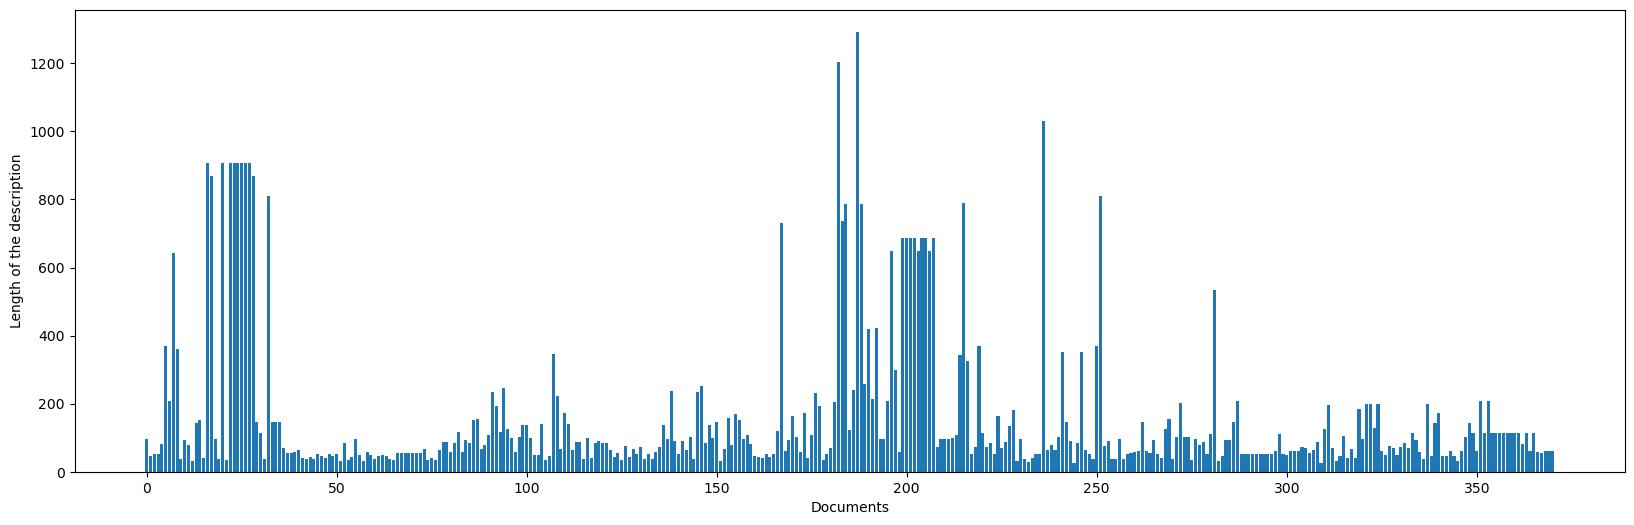

In [122]:
l = []
for doc in alldocs:
    l.append(len(doc.words))

print('Number of Documents : ', len(alldocs))
print('Mean length of documents : ', np.mean(l))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(l)), l)
plt.xlabel('Documents')
plt.ylabel('Length of the description')

In [123]:
index = 0
doc = alldocs[index]
print(doc, '\n')
print(symptoms[doc.original_number])

SentimentDocument(words=['a', 'round', 'or', 'ovalshaped', 'waxy', 'or', 'rough', 'bump', 'typically', 'on', 'the', 'face', 'chest', 'a', 'shoulder', 'or', 'the', 'back', 'a', 'flat', 'growth', 'or', 'a', 'slightly', 'raised', 'bump', 'with', 'a', 'scaly', 'surface', 'with', 'a', 'characteristic', 'pasted', 'on', 'look', 'varied', 'size', 'from', 'very', 'small', 'to', 'more', 'than', '1', 'inch', '25', 'centimeters', 'across', 'varied', 'number', 'ranging', 'from', 'a', 'single', 'growth', 'to', 'multiple', 'growths', 'very', 'small', 'growths', 'clustered', 'around', 'the', 'eyes', 'or', 'elsewhere', 'on', 'the', 'face', 'sometimes', 'called', 'flesh', 'moles', 'or', 'dermatosis', 'papulosa', 'nigra', 'common', 'on', 'black', 'or', 'brown', 'skin', 'varied', 'in', 'color', 'ranging', 'from', 'light', 'tan', 'to', 'brown', 'or', 'black', 'itchiness'], tags=[0], title='Benign Tumors', original_number=0) 

A round or oval-shaped waxy or rough bump, typically on the face, chest, a should

In [124]:
# Creating and training Doc2Vec Model
from gensim.models import Word2Vec, Doc2Vec

model = Doc2Vec(dm=1, vector_size=300,window=10,hs=0,min_count=10,dbow_words=1,sample=1e-5)

# build the vocabulary 
model.build_vocab(alldocs)
model.train(alldocs, total_examples=model.corpus_count, epochs=100, start_alpha=0.01, end_alpha=0.01)



In [ ]:
# Save and load models
model.save("model")
# Doc2Vec.load("model")

In [125]:
model.wv.most_similar_cosmul(positive = ["patches"])

[('like', 0.9996909499168396),
 ('tan', 0.9996848702430725),
 ('painless', 0.9996763467788696),
 ('clear', 0.9996740818023682),
 ('reddish', 0.9996728897094727),
 ('start', 0.9996716976165771),
 ('skinthe', 0.9996671676635742),
 ('difficult', 0.9996623992919922),
 ('dark', 0.9996621012687683),
 ('purple', 0.999660849571228)]

In [126]:
model.wv.most_similar_cosmul(positive = ["fever"])

[('factor', 0.9997221231460571),
 ('had', 0.9995490312576294),
 ('lichen', 0.9995397329330444),
 ('seborrheic', 0.999527633190155),
 ('family', 0.9994472861289978),
 ('allergens', 0.999434232711792),
 ('other', 0.9994302988052368),
 ('actually', 0.9994288682937622),
 ('several', 0.9994075894355774),
 ('temporary', 0.9994010925292969)]

In [127]:
#Creating Class Labels
text_data = selecteddf['Symptoms']

symptom_to_disease = {}

# Iterate through the rows of the DataFrame and create the mapping
for index, row in selecteddf.iterrows():
    symptom = row['Symptoms']  
    disease = row['Disease']   
    symptom_to_disease[symptom] = disease

# Print the created mapping
print(symptom_to_disease)

class_labels = [symptom_to_disease[symptom] for symptom in text_data]
class_labels


{'A round or oval-shaped waxy or rough bump, typically on the face, chest, a shoulder or the back\nA flat growth or a slightly raised bump with a scaly surface, with a characteristic "pasted on" look\nVaried size, from very small to more than 1 inch (2.5 centimeters) across\nVaried number, ranging from a single growth to multiple growths\nVery small growths clustered around the eyes or elsewhere on the face, sometimes called flesh moles or dermatosis papulosa nigra, common on Black or brown skin\nVaried in color, ranging from light tan to brown or black\nItchiness\n': 'Benign Tumors', '\nA small, round bump under the skin, usually on the face, neck or trunk\nA tiny blackhead plugging the central opening of the cyst\nA thick, yellow, smelly material that sometimes drains from the cyst\nRedness, swelling and tenderness in the area, if inflamed or infected\n': 'Benign Tumors', 'yellowish or flesh-colored bumps on the skin. These bumps are shiny and usually on the face, especially the fore

['Benign Tumors',
 'Benign Tumors',
 'Benign Tumors',
 'Benign Tumors',
 'Lupus and other Connective Tissue diseases',
 'Lupus and other Connective Tissue diseases',
 'Lupus and other Connective Tissue diseases',
 'Lupus and other Connective Tissue diseases',
 'Lupus and other Connective Tissue diseases',
 'Lupus and other Connective Tissue diseases',
 'Lupus and other Connective Tissue diseases',
 'Lupus and other Connective Tissue diseases',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infestations and Bites',
 'Scabies Lyme Diease and other Infesta

In [128]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(selecteddf):
    
    if isinstance(selecteddf, str):
    # selecteddf = selecteddf.lower() # lowercase text
        selecteddf = selecteddf.lower()
        selecteddf = REPLACE_BY_SPACE_RE.sub(' ', selecteddf) # replace REPLACE_BY_SPACE_RE symbols by space in text
        selecteddf = BAD_SYMBOLS_RE.sub('', selecteddf) # delete symbols which are in BAD_SYMBOLS_RE from text
        selecteddf = ' '.join(word for word in selecteddf.split() if word not in STOPWORDS) # delete stopwors from text
    return selecteddf

selecteddf['Symptoms'] = selecteddf['Symptoms'].apply(clean_text)

# word_count = selecteddf['Symptoms'].apply(lambda x: len(x.split(' '))) if isinstance(x, str) else 0).sum()
# print("Total word count after text cleaning:", word_count)
# selecteddf['Symptoms'].apply(lambda x: len(x.split(' '))).sum()
print(selecteddf['Symptoms'])

3       round ovalshaped waxy rough bump typically fac...
4       small round bump skin usually face neck trunka...
5       yellowish fleshcolored bumps skin bumps shiny ...
6       thick irregular scarring typically earlobes sh...
43      itch burning painlocalised swellingblanchable ...
                              ...                        
2303    symptoms nappy rash includered raw patches bab...
2304    child may joint hypermobility syndrome youofte...
2305    symptoms keratosis pilaris may includeyou usua...
2306    symptoms keratosis pilaris may includeyou usua...
2307    symptoms keratosis pilaris may includeyou usua...
Name: Symptoms, Length: 446, dtype: object


c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [129]:
selecteddf = selecteddf.dropna(subset=['Symptoms', 'Disease'])
X = selecteddf.Symptoms
y = selecteddf.Disease
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print(X_train)

46      signs symptoms morphea vary depending type sta...
1028    red dry patches skinrashes may ooze weep clear...
60      drooping one eyelids called ptosisdouble visio...
853     tick quite small almost impossible see rather ...
2103    dry skin caused bycold dry winter airfurnaces ...
                              ...                        
309     ticks parasites feed warmblooded hosts biting ...
565     cholesterol granulomas dont always cause sympt...
1541    actinic keratosis ak develops skin badly damag...
1996    exposure cold strong emotions bring changesfir...
560     early stages mucinous carcinoma may symptoms e...
Name: Symptoms, Length: 289, dtype: object


In [130]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = naivebayes.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names= selected_rows))



accuracy 0.7903225806451613
                                                      precision    recall  f1-score   support

                                   Atopic Dermatitis       0.71      0.95      0.81        57
Scabies Lyme Diease and other Infestations and Bites       1.00      0.08      0.14        13
                                       Benign Tumors       0.87      0.72      0.79        18
          Lupus and other Connective Tissue diseases       0.94      0.83      0.88        36

                                            accuracy                           0.79       124
                                           macro avg       0.88      0.64      0.66       124
                                        weighted avg       0.83      0.79      0.76       124



In [131]:
# Linear Support Vector Machine

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=selected_rows))

accuracy 0.8709677419354839
                                                      precision    recall  f1-score   support

                                   Atopic Dermatitis       0.96      0.88      0.92        57
Scabies Lyme Diease and other Infestations and Bites       0.83      0.77      0.80        13
                                       Benign Tumors       0.70      0.89      0.78        18
          Lupus and other Connective Tissue diseases       0.86      0.89      0.88        36

                                            accuracy                           0.87       124
                                           macro avg       0.84      0.86      0.84       124
                                        weighted avg       0.88      0.87      0.87       124



In [142]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Collect user input
user_input = input("Enter text: A round or oval-shaped waxy or rough bump A flat growth or a slightly raised bump with a scaly surface. Varied size, from very small to more than 1 inch (2.5 centimeters) Varied number, ranging from a single growth to multiple growths Very small growths clustered around the eyes or elsewhere on the face, sometimes called flesh moles or dermatosis papulosa nigra, common on Black or brown skin Varied in color, ranging from light tan to brown or black Itchiness ")

# Preprocess the user's input
cleaned_input = clean_text(user_input)
vectorized_input = tfidf_vectorizer.transform([cleaned_input])

# Make predictions
predicted_class = sgd.predict(vectorized_input)

# Display the predicted class
print("Predicted disease class: ", predicted_class[0])

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Text vectorization using TF-IDF
tfidf_vectorizer = CountVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("X_train_tfidf shape:", X_train_tfidf.shape)

# Train a Logistic Regression model
# classifier = LogisticRegression()
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

X_train_tfidf shape: (289, 4316)
Accuracy: 0.81


In [138]:
model = Doc2Vec(dm=1, vector_size=300, window=5, min_count=5, sample=1e-5)

# Apply data preprocessing, such as removing stopwords and stemming/lemmatization
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = text.lower().split()
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

tokens = ["A round or oval-shaped waxy or rough bump", "A flat growth or a slightly raised bump with a scaly surface",
          "Varied size, from very small to more than 1 inch (2.5 centimeters) Varied number, ranging from a single growth to multiple growths Very small growths clustered around the eyes or elsewhere on the face, sometimes called flesh moles or dermatosis papulosa nigra, common on Black or brown skin Varied in color, ranging from light tan to brown or black Itchiness"]

processed_tokens = [preprocess_text(token) for token in tokens]

# Train the model with the adjusted parameters
model.build_vocab(alldocs)
model.train(alldocs, total_examples=model.corpus_count, epochs=100, start_alpha=0.01, end_alpha=0.01)

# Infer the document vector for processed tokens
new_vector = model.infer_vector(processed_tokens, alpha=0.001, epochs=20)

# Find the top N most similar documents
N = 5  # Adjust N as needed
most_similar_documents = model.docvecs.most_similar([new_vector], topn=N)

# Print the titles and distances of the most similar documents
for tag, distance in most_similar_documents:
    doc_similar = alldocs[tag]
    print("Disease:", doc_similar.title)
    print("Similarity:", distance)
    print("Symptoms:", symptoms[doc_similar.original_number])
    print("\n")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziyuu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Disease: Atopic Dermatitis
Similarity: 0.06999059021472931
Symptoms: Atopic dermatitis is a chronic condition that causes itchy skin that gets dry and scaly. It tends to come and go and may only be in childhood or may affect you your entire life. In people with light-colored skin, atopic dermatitis looks like red rashes. People with darker skin may develop brown, purple or gray rashes.


Disease: Lupus and other Connective Tissue diseases
Similarity: 0.06797207146883011
Symptoms: Scleroderma's signs and symptoms vary from person to person, depending on which parts of the body are affected.Nearly everyone who has scleroderma experiences a hardening and tightening of the skin.The first parts of the body to be affected are usually the fingers, hands, feet and face. In some people, the skin thickening can also involve the forearms, upper arms, chest, abdomen, lower legs and thighs. Early symptoms may include swelling and itchiness. Affected skin can become lighter or darker in color and ma

c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).


In [135]:
tokens = ["A round or oval-shaped waxy or rough bump", "A flat growth or a slightly raised bump with a scaly surface"]

# Infer the document vector
new_vector = model.infer_vector(tokens, alpha=0.001, epochs=20)

# Find the top N most similar documents
N = 5  # Adjust N as needed
most_similar_documents = model.docvecs.most_similar([new_vector], topn=N)

# Print the titles and distances of the most similar documents
for tag, distance in most_similar_documents:
    doc_similar = alldocs[tag]
    print("Disease:", doc_similar.title)
    print("Similarity:", distance) # 0 means perfect similarity, 1 is completely not similar
    print("Symptoms:", symptoms[doc_similar.original_number])
    print("\n")

Disease: Lupus and other Connective Tissue diseases
Similarity: 0.048119109123945236
Symptoms:   The usual initial symptom of systemic sclerosis is swelling then thickening and tightening of the skin at the ends of the fingers. Raynaud syndrome     Raynaud Syndrome  Raynaud syndrome, a functional peripheral arterial disease, is a condition in which small arteries (arterioles), usually in the fingers or toes, narrow (constrict) more tightly than normal in...  read more        , in which the fingers suddenly and temporarily become very pale and tingle or become numb, painful, or both in response to cold or emotional upset, is also common. Fingers may become bluish or white. Heartburn, difficulty in swallowing     Difficulty Swallowing  Some people have difficulty swallowing (dysphagia). In dysphagia, foods and/or liquids do not move normally from the throat (pharynx) to the stomach. People feel as though food or liquids become...  read more     , and shortness of breath are occasionally 

c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  


In [ ]:
try:
    import string
    from nltk.corpus import stopwords
    import nltk
except Exception as e:
    print(e)

class PreProcessText(object):
    def __init__(self):
        pass
    def __remove_punctuation(self,text):
        message = []
        for x in text: 
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        return message 
    
    def __remove_stopwords(self , text):
        words = []
        for x in text.split():
            if x.lower() in stopwords.words():
                pass
            else:
                words.append(x)
        return words 
    
        print(words)
    
    def token_words(self, text = ''): #takes string, return token also called list of words that is used to train the model 
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words



    

In [ ]:
import nltk
flag = nltk.download("stopwords")
if (flag == "False" or flag == False):
    print("Failed to Download stop words")
else: 
    print("Downloaded Stop words")
    helper = PreProcessText()
    words = helper.token_words(text=df)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec([words], size = 100, window = 5, min_count = 1, workers = 4)